In [34]:
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
from prophet import Prophet

import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [35]:
df=pd.read_csv('filtered_nn_data.csv')
print(df.head())
df = df[['date', 'orders']]

         date  year      uv  buyer    gmv  orders     cr  day_of_week  \
0  2021-01-01  2021   96281   3595  66052    4331  0.037            4   
1  2021-01-02  2021   93620   3852  68483    4599  0.041            5   
2  2021-01-03  2021   98196   4402  75556    5254  0.045            6   
3  2021-01-04  2021  108903   4374  75432    5292  0.040            0   
4  2021-01-05  2021  123715   4486  74678    5518  0.036            1   

   weekday day_type  day_binary campaign_info campaign_type  
0        1  Weekday         100  non campaign  non-campaign  
1        0  Weekend         101  non campaign  non-campaign  
2        0  Weekend         110  non campaign  non-campaign  
3        1  Weekday           0  non campaign  non-campaign  
4        1  Weekday           1  non campaign  non-campaign  


In [36]:
df.head()


,date,orders
0,2021-01-01,4331
1,2021-01-02,4599
2,2021-01-03,5254
3,2021-01-04,5292
4,2021-01-05,5518


In [37]:
print(df.shape)

(748, 2)


In [38]:
#Train-test split
# train1, test1 = df[1:df.shape[0]-20], df[df.shape[0]-20:]

In [39]:
df.columns = ['ds','y']
df.head()

df['ds'] = pd.to_datetime(df['ds'])
# Initialize the Model
model=Prophet(changepoint_prior_scale=0.01,  
    seasonality_prior_scale=30, yearly_seasonality=True,  holidays=None, seasonality_mode='additive')
model.fit(df)

### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

15:22:27 - cmdstanpy - INFO - Chain [1] start processing
15:22:27 - cmdstanpy - INFO - Chain [1] done processing


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/2 [00:00<?, ?it/s]

15:22:27 - cmdstanpy - INFO - Chain [1] start processing
15:22:27 - cmdstanpy - INFO - Chain [1] done processing
15:22:27 - cmdstanpy - INFO - Chain [1] start processing
15:22:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 1664.6032930138483
Mean Squared Error (MSE): 3701812.1803504573
Root Mean Squared Error (RMSE): 1924.0094023550034
Mean Absolute Percentage Error (MAPE): 20.87528898277801%
Weighted Mean Absolute Percentage Error (WMAPE): 20.612971300884308%


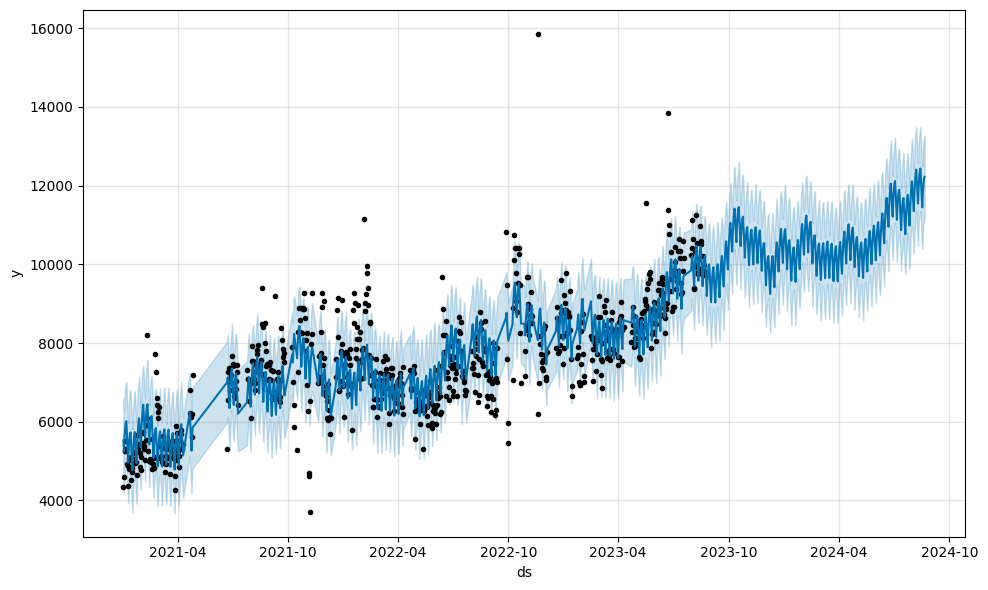

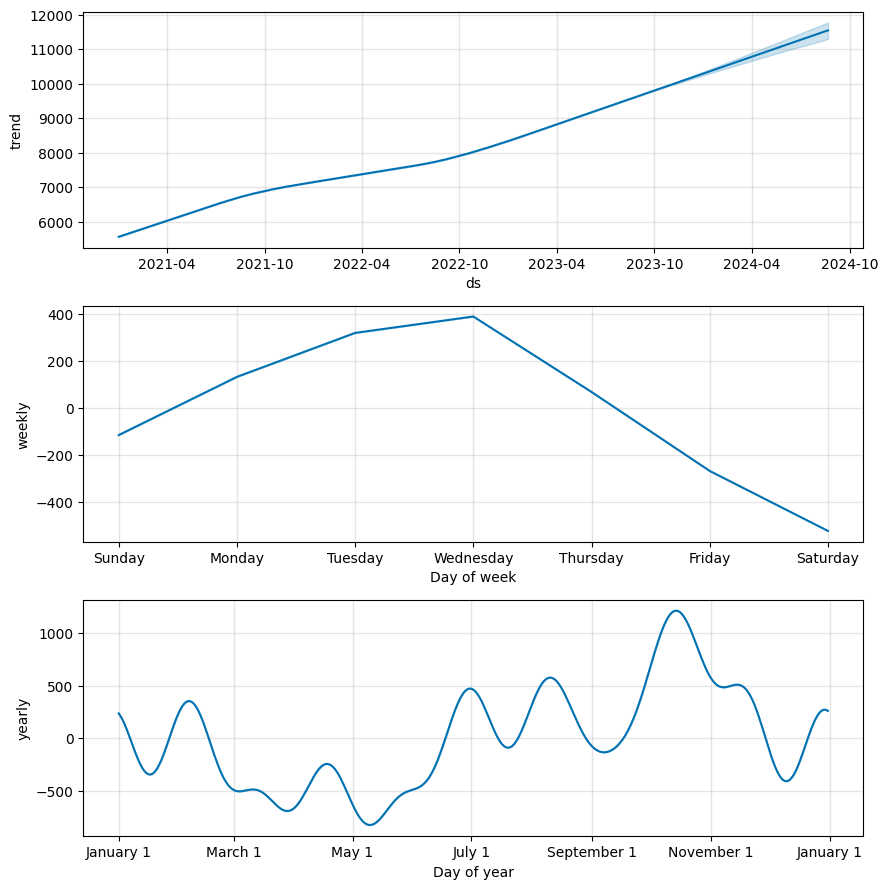

In [40]:

prediction=model.predict(future_dates)
prediction.head()
### plot the predicted projection
model.plot(prediction)
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

from prophet.diagnostics import cross_validation


# Perform cross-validation
df_cv = cross_validation(model, initial='365 days', period='180 days', horizon='360 days')


df_cv.head()
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)


# Calculate accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
mse = mean_squared_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((df_cv['y'] - df_cv['yhat']) / df_cv['y'])) * 100
wmape = np.sum(np.abs(df_cv['y'] - df_cv['yhat'])) / np.sum(df_cv['y']) * 100

# Print the accuracy metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Weighted Mean Absolute Percentage Error (WMAPE): {wmape}%')


In [41]:
# Create an interactive Plotly figure for the predictions with an increased size
fig = px.line(
    x=prediction['ds'],
    y=prediction['yhat'],
    labels={'x': 'Date', 'y': 'Predicted'},
    title='Interactive Predicted Projections',
    height=600,  # Adjust the height as needed
    width=1000,  # Adjust the width as needed
)
fig.add_scatter(x=df['ds'], y=df['y'], mode='lines', name='Actual')  # Actual data
fig.show()

# Extract prediction dates and order values
prediction_dates = prediction['ds']
predicted_orders = prediction['yhat']

# Convert prediction_dates and predicted_orders to lists
prediction_dates_list = prediction_dates.tolist()
predicted_orders_list = predicted_orders.tolist()

# Print the list of prediction dates and order values
for date, order in zip(prediction_dates_list, predicted_orders_list):
    print(f"Date: {date}, Predicted Orders: {order}")


Date: 2021-01-01 00:00:00, Predicted Orders: 5524.593350531723
Date: 2021-01-02 00:00:00, Predicted Orders: 5246.320128611469
Date: 2021-01-03 00:00:00, Predicted Orders: 5625.367184927281
Date: 2021-01-04 00:00:00, Predicted Orders: 5838.195047237161
Date: 2021-01-05 00:00:00, Predicted Orders: 5985.807939155501
Date: 2021-01-06 00:00:00, Predicted Orders: 6012.479518234918
Date: 2021-01-07 00:00:00, Predicted Orders: 5645.6758410170805
Date: 2021-01-08 00:00:00, Predicted Orders: 5263.087143027762
Date: 2021-01-09 00:00:00, Predicted Orders: 4962.288325812819
Date: 2021-01-10 00:00:00, Predicted Orders: 5327.543759737181
Date: 2021-01-11 00:00:00, Predicted Orders: 5535.674373643558
Date: 2021-01-12 00:00:00, Predicted Orders: 5687.804878230232
Date: 2021-01-13 00:00:00, Predicted Orders: 5728.086580666526
Date: 2021-01-14 00:00:00, Predicted Orders: 5383.623922529749
Date: 2021-01-15 00:00:00, Predicted Orders: 5031.516223718167
Date: 2021-01-16 00:00:00, Predicted Orders: 4768.5342

In [50]:
from datetime import datetime

user_input_date_str = input("Enter a date in yyyy-mm-dd format: ")
user_input_date = datetime.strptime(user_input_date_str, '%Y-%m-%d')
user_input_df = pd.DataFrame({'ds': [user_input_date]})
forecast = model.predict(user_input_df)


user_input_df = pd.DataFrame({'ds': [user_input_date]})
forecasted_value = forecast.loc[0, 'yhat']
print(f"Forecasted Orders for {user_input_date_str}: {forecasted_value}")

# 2023-08-30
# 2023-09-13

Forecasted Orders for 2023-09-13: 10001.723142292252


In [43]:

# from datetime import datetime
# # print(prediction_df.head())

# # Create a DataFrame from the prediction dates and order values
# prediction_df = pd.DataFrame({'Date': prediction_dates_list, 'Predicted Orders': predicted_orders_list})

# # Convert the 'Date' column to datetime
# prediction_df['Date'] = pd.to_datetime(prediction_df['Date'])

# # Filter the DataFrame to include only dates after 2023-08-22
# start_date = datetime(2023, 8, 23)  # Define the start date
# filtered_prediction_df = prediction_df[prediction_df['Date'] > start_date]

# # Save the filtered DataFrame to an Excel file
# filtered_prediction_df.to_excel('2.predicted_orders_after_2023-08-22.xlsx', index=False)
